In [15]:
import numpy as np

Nhập input

In [16]:
denta = [0.5e-5, 1e-4, 2e-2, 1e-2]

# hàm tính giá trị f(x)
def f(x):
    return 1/(1+x**2)
# cận trên
a = 0
#cận dưới
b = 3
# sai số
eps = 0.5e-8
# số mốc
n = 10

In [17]:
# tính đạo hàm cấp 1 của f(x)
def df(x):
    return (f(x + denta[0]) - f(x - denta[0])) / (2*denta[0])

# tính đạo hàm cấp 2 của f(x)
def ddf(x):
    return (df(x + denta[1]) - df(x - denta[1])) / (2*denta[1])

# tính đạo hàm cấp 3 của f(x)
def dddf(x):
    return (ddf(x + denta[2]) - ddf(x - denta[2])) / (2*denta[2])

# tính đạo hàm cấp 4 của f(x)
def ddddf(x):
    return (dddf(x + denta[3]) - dddf(x - denta[3])) / (2*denta[3])

In [18]:
# tính max của đạo hàm cấp 2 trên đoạn [a, b]
def max_ddf(a, b):
    max = 0
    for i in np.arange(a, b, 1e-2):
        if np.abs(ddf(i)) > max:
            max = np.abs(ddf(i))
    return max

# tính max của đạo hàm cấp 4 trên đoạn [a, b]
def max_ddddf(a, b):
    max = 0
    for i in np.arange(a, b, 1e-2):
        if np.abs(dddf(i)) > max:
            max = np.abs(dddf(i))
    return max

In [19]:
# nhân đa thức bằng hoocne
def hoocne_product(x):
    # tich cua cac nghiem
    # Li luu he so da thuc sau moi lan nhan
    a = list()
    Li = [np.array([1])]
    a.append(np.array([1, 0]))
    for i in x:
        b = a[-1]
        c = list()
        c.append(1)
        for j in range(len(b) - 1):
            c.append(b[j + 1]- b[j] * i)
        c.append(0)
        a.append(np.array(c))
        Li.append(np.delete(a[-1], -1))
    return Li

# chia đa thức bằng hoocne
def hoocne_quatient(a, x):
    # chia gia tri cua da thuc P(x) cho (x - x_0)
    # tra ve b và b_0 trong do:
    # b la he so cua da thuc sau khi chia
    # b_0 la phan du va la ket qua cua P(x_0)
    y = list()
    y.append(a[0])
    for i in range(len(a) - 1):
        y.append(y[i] * x + a[i + 1])
    b = np.array(y[:-1])
    b_0 = np.array(y[-1])
    return b, b_0

In [20]:
# đọc input 2 từ file
def doc_input2 (ten_file):
    print("======================================================")
    print("Kieu du lieu dau vao: ")
    print("1. Ngang")
    print("2. Doc")
    chon = int(input("chon kieu dau vao: "))
    if(chon == 1):
        # doc file input.txt
        inp = open(ten_file, "r")
        # doc du lieu cua x va y
        x = inp.readline()
        y = inp.readline()
        # xu ly du lieu cua x va y
        x = x.strip().split()
        x = np.array(x, dtype=float)
        if (y == ""):
            y = f(x)
            y = np.array(y, dtype=float)
            inp.close()
        else:
            y = y.strip().split()
            y = np.array(y, dtype=float)
            inp.close()
    else:
        x = list()
        y = list()
        f = open(ten_file, "r")
        for z in f:
            z = z.strip().split()
            x.append(float(z[0]))
            y.append(float(z[1]))
        x = np.array(x, dtype=float)
        y = np.array(y, dtype=float)

    return x, y

In [21]:
def kiem_tra_sap_xep(x):
    # tra ve 1 neu la sap xep tang dan
    # tra ve -1 neu la sap xep giam dan
    # tra ve 0 neu cac moc khong duoc sap xep
    if x[0] < x[1]:
        kieu_sap_xep = 1
    else:
        kieu_sap_xep = -1
    for i in range(x.shape[0] - 1):
        if x[i] < x[i + 1]:
            hien_tai = 1
        else:
            hien_tai = -1
        if abs(kieu_sap_xep - hien_tai) > 1e-7:
            return 0
    return kieu_sap_xep

def key_sort(z):
    return z[0]

def sap_xep_moc_noi_suy(x, y):
    # thuc hien sap xep moc noi suy neu cac moc chua duoc sap xep
    z = list()  
    x0 = list()
    y0 = list()
    n = x.shape[0]
    for i in range(n):
        z.append(np.array([x[i], y[i]]))
    z.sort(key=key_sort)
    for i in range(n):
        x0.append(z[i][0])
        y0.append(z[i][1])
    return np.array(x0), np.array(y0)

def kiem_tra_cach_deu(x):
    # tra ve buoc nhay neu nhu cac moc cach deu
    # tra ve 0 neu du lieu khong cach deu
    denta = x[1] - x[0]
    for i in range(2, x.shape[0]):
        if abs(x[i] - x[i - 1] - denta) > 1e-7:
            return 0
    return denta

def kiem_tra_chan_le(x):
    # tra ve 0 neu so moc noi suy la chan
    # tra ve 1 neu so moc noi suy la le
    n = x.shape[0]
    if(n % 2 == 0):
        return 0
    else:
        return 1

def kiem_tra_input (x, y):
    # tra ve 1 khi cac moc noi suy khong sap xep hoac khong cach deu
    # tra ve 2 khi cac moc noi suy la sap xep va cach deu
    # tra ve 0 khi cac moc noi suy trung nhau hoac kich thuoc cua x va y khac nhau

    # kiem tra kich thuoc du lieu
    if (x.shape[0] != y.shape[0]):
        print("kich thuoc khong hop le")
        return 0, x, y

    # kiem tra du lieu trung
    for i in x:
        if (np.where(x == i)[0].shape[0] > 1):
            print("du lieu cua x o cac vi tri ", np.where(x == i)[0], " trung nhau")
            return 0, x, y

    # input hop le
    print("input hop le")

    if(kiem_tra_sap_xep(x) == 1):
        if(kiem_tra_cach_deu(x)):
            if(x.shape[0] % 2 == 0):
                print("so moc noi suy la chan")
                return 1, x, y
            else:
                print("so moc noi suy la le")
                return 2, x, y

            
    elif(kiem_tra_sap_xep(x) == 0):
        pass
        # x, y = sap_xep_moc_noi_suy(x, y)
        # if(kiem_tra_cach_deu(x)):
        #     return 2, x, y

    else:
        x = np.flip(x)
        y = np.flip(y)
        if(kiem_tra_cach_deu(x)):
            if(x.shape[0] % 2 == 0):
                print("so moc noi suy la chan")
                return 1, x, y
            else:
                print("so moc noi suy la le")
                return 2, x, y

    return 1, x, y

Công thức tính gần đúng tích phân\
====================================================================\
Công thức hình thang:\
Công thức tính gần đúng tích phân địa phương: $\displaystyle I = \frac{b - a}{2}(y_0 + y_1)$\
Công thức tính gần đúng tích phân tổng quát: $\displaystyle I = \frac{h}{2}\left(y_0 + y_n + 2\sum_{i = 1}^{n - 1}y_i\right), \quad h = \frac{b - a}{n}$\
====================================================================\
Công thức simpson:\
Công thức tính gần đúng tích phân địa phương: $\displaystyle I = \frac{b - a}{6}(y_0 + 4y_1 + y_2)$\
Công thức tính gần đúng tích phân tổng quát: $\displaystyle I = \frac{h}{3}(y_0 + y_{2n} + 4\sigma_1 + 2\sigma_2), \quad h = \frac{b - a}{2n}$\
Trong đó: $\sigma_1$ là tổng các phần tử ở vị trí lẻ và $\sigma_1$ là tổng các phần tử ở vị trí lẻ

In [22]:
# tính các mốc cần dùng để tính tích phân theo hình thang
def mocs_hinh_thang(a, b, n):
    mocs = []
    h = (b - a) / n
    for i in range(n + 1):
        mocs.append(a + i * h)
    x = np.array(mocs)
    y = f(x)
    return x, y

# tính các mốc cần dùng để tính tích phân theo simpson
def mocs_simpson(a, b, n):
    mocs = []
    h = (b - a) / (2 * n)
    for i in range(2 * n + 1):
        mocs.append(a + i * h)
    x = np.array(mocs)
    y = f(x)
    return x, y

Công thức tính sai số và tính số mốc\
====================================================================\
Công thức hình thang:\
Công thức sai số địa phương: $\displaystyle eps = \frac{M_2h^3}{12}$\
Công thức sai số tổng quát: $\displaystyle eps = \frac{M_2(b - a)}{12}h^2$\
Công thức tính số mốc theo sai số: $\displaystyle n = int\left(\sqrt{\frac{M_2(b - a)^3}{12eps}}\right) + 1$\
Công thức lưới đều: $\displaystyle eps = \frac{|I_2h - I_h|}{3}$\
====================================================================\
Công thức simpson:\
Công thức sai số địa phương: $\displaystyle eps = \frac{M_4h^5}{90}$\
Công thức sai số tổng quát: $\displaystyle eps = \frac{M_4(b - a)}{180}h^4$\
Công thức tính số mốc theo sai số: $\displaystyle n = int\left(\frac{1}{2}\sqrt[4]{\frac{M_4(b - a)^5}{180eps}}\right) + 1$\
Công thức lưới đều: $\displaystyle eps = \frac{|I_2h - I_h|}{15}$

In [23]:
# tính tích phân theo hình thang với input 1-1
def tich_phan_hinh_thang_input1_1(a, b, eps):
    n0 = int(np.sqrt((b - a)**3 * abs(max_ddf(a, b)) / (12 * eps))) + 2
    x, y = mocs_hinh_thang(a, b, n0 - 1)
    h = x[1] - x[0]
    sai_so = (b - a) * abs(max_ddf(a, b)) * h**2 / 12
    print("giá trị lớn nhất của đạo hàm bậc 2: ", max_ddf(a, b))
    print("Số môc được sử dụng: ", n0)
    print("Khoảng cách giữa các mốc: ",h)
    return h/2*(y[0] + y[-1] + 2 * np.sum(y[1:-1])), sai_so

# tính tích phân theo hình thang với input 1-2
def tich_phan_hinh_thang_input1_2(a, b, n):
    x, y = mocs_hinh_thang(a, b, n - 1)
    h = x[1] - x[0]
    sai_so = (b - a) * abs(max_ddf(a, b)) * h**2 / 12
    print("Số môc được sử dụng: ", n)
    print("Khoảng cách giữa các mốc: ",h)
    return h/2*(y[0] + y[-1] + 2 * np.sum(y[1:-1])), sai_so

# tính tích phân theo simpson với input 1-1
def tich_phan_simpson_input1_1(a, b, eps):
    n0 = int(((b - a)**5 * abs(max_ddddf(a, b)) / (180 * eps))**(1/4) / 2) + 2
    if n0 % 2 == 0:
        print("Số mốc là số chắn nên được cộng thêm 1 !!!")
        n0 += 1
    x, y = mocs_simpson(a, b, n0 - 1)
    h = x[1] - x[0]
    sai_so = (b - a) * abs(max_ddddf(a, b)) * h**4 / 180
    print("giá trị lớn nhất của đạo hàm bậc 4: ", max_ddddf(a, b))
    print("Số môc được sử dụng: ", 2 * n0 - 1)
    print("Khoảng cách giữa các mốc: ",h)
    return h/3*(y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2])), sai_so

# tính tích phân theo simpson với input 1-2
def tich_phan_simpson_input1_2(a, b, n):
    x, y = mocs_simpson(a, b, n - 1)
    h = x[1] - x[0]
    sai_so = (b - a) * abs(max_ddddf(a, b)) * h**4 / 180
    print("Số môc được sử dụng: ", 2 * n - 1)
    print("Khoảng cách giữa các mốc: ",h)
    return h/3*(y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2])), sai_so

In [24]:
# tính tích phân bằng công thức hình thang với input là các mốc x, y và đánh giá sai số eps
def tich_phan_hinh_thang_input2(x, y):
    h = x[1] - x[0]
    Ih = h/2*(y[0] + y[-1] + 2 * np.sum(y[1:-1]))
    I2h = h*(y[0] + y[-1] + 2*np.sum(y[2:-2:2]))
    eps = abs(Ih - I2h)/3
    print("Số môc được sử dụng: ", x.shape[0])
    print("Khoảng cách giữa các mốc: ",h)
    print("giá trị của I2h: ", I2h)
    print("giá trị của Ih: ", Ih)
    return Ih, eps

# tính tích phân bằng công thức simpson với input là các mốc x, y và đánh giá sai số eps
def tich_phan_simpson_input2(x, y):
    h = x[1] - x[0]
    Ih = h/3*(y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]))
    I2h = 2*h/3*(y[0] + y[-1] + 4*np.sum(y[2:-2:4]) + 2*np.sum(y[4:-4:4]))
    eps = abs(Ih - I2h)/15
    print("Số môc được sử dụng: ", x.shape[0])
    print("Khoảng cách giữa các mốc: ",h)
    print("giá trị của I2h: ", I2h)
    print("giá trị của Ih: ", Ih)
    return Ih, eps

Công thức tính hệ số newton cote bậc n:\
$$A_i = \int_0^n\prod_{j = 0, j \neq i}^n\frac{t - j}{i - j}dt, \quad i = [0, n]$$

In [25]:
# tính hệ số của tích phân bằng newton cotes
def newton_cotes_coefficient(k):
    # trả về một mảng là hệ số của công thức newton cotes
    # k là số lượng mốc
    IP = list()
    omega = hoocne_product(np.linspace(0, k - 1, k))[-1]
    for i in range(k):
        P = hoocne_quatient(omega, i)[0] / np.linspace(k, 1, k)
        product = 1
        for j in range(k):
            if(j != i):
                product *= (i - j)
        P = np.concatenate((P, np.array([0])))
        IP.append(hoocne_quatient(P, k - 1)[1] / product)
    return np.array(IP) / (k-1)

chạy chương trình với input 1

In [26]:
# chạy chương trình với input 1
print("===============================")
result1_1, eps1_1 = tich_phan_hinh_thang_input1_1(a, b, eps)
print("tích phân theo hình thang với eps = {}: ".format(eps), result1_1)
print("sai số thu được: ", eps1_1)
print("-----------------------------")
result2_1, eps2_1 = tich_phan_simpson_input1_1(a, b, eps)
print("tích phân theo simpson với eps = {}: ".format(eps), result2_1)
print("sai số thu được: ", eps2_1)
print("===============================")
result1_2, eps1_2 = tich_phan_hinh_thang_input1_2(a, b, n)
print("tích phân theo hình thang với n = {}: ".format(n), result1_2)
print("sai số thu được: ", eps1_2)
if n % 2 == 0:
    print("n phải là số lẻ để tính được tích phân theo simpson")
else:
    print("-----------------------------")
    result2_2, eps2_2 = tich_phan_simpson_input1_2(a, b, n)
    print("tích phân theo simpson với n = {}: ".format(n), result2_2)
    print("sai số thu được: ", eps2_2)

giá trị lớn nhất của đạo hàm bậc 2:  1.9999999434361366
Số môc được sử dụng:  30001
Khoảng cách giữa các mốc:  0.0001
tích phân theo hình thang với eps = 5e-09:  1.2490457723482544
sai số thu được:  4.999999858590342e-09
-----------------------------
Số mốc là số chắn nên được cộng thêm 1 !!!
giá trị lớn nhất của đạo hàm bậc 4:  4.661952768270083
Số môc được sử dụng:  193
Khoảng cách giữa các mốc:  0.015625
tích phân theo simpson với eps = 5e-09:  1.2490457723791821
sai số thu được:  4.631233978539788e-09
Số môc được sử dụng:  10
Khoảng cách giữa các mốc:  0.3333333333333333
tích phân theo hình thang với n = 10:  1.2484912198955378
sai số thu được:  0.05555555398433712
n phải là số lẻ để tính được tích phân theo simpson


chạy chương trình với input 2

In [27]:
# chạy chương trình với input 2
x, y = doc_input2("input2.txt")
check, x, y = kiem_tra_input(x, y) 
if check == 1:
    print("khong the tinh tich phan")
elif check == 2:
    result1, eps1 = tich_phan_hinh_thang_input2(x, y)
    print("tích phân theo hình thang: ", result1)
    print("sai số theo lưới đều: ", eps1)
    print("-----------------------------")
    result2, eps2 = tich_phan_simpson_input2(x, y)
    print("tích phân theo simpson: ", result2)
    print("sai số theo lưới đều: ", eps2)
else:
    print("các mốc không sắp xếp hoặc không cách đều")

Kieu du lieu dau vao: 
1. Ngang
2. Doc
input hop le
so moc noi suy la le
Số môc được sử dụng:  21
Khoảng cách giữa các mốc:  0.10000000000000009
giá trị của I2h:  6.276321430000005
giá trị của Ih:  6.277015105000006
tích phân theo hình thang:  6.277015105000006
sai số theo lưới đều:  0.00023122500000027912
-----------------------------
Số môc được sử dụng:  21
Khoảng cách giữa các mốc:  0.10000000000000009
giá trị của I2h:  6.277248686666672
giá trị của Ih:  6.277246330000005
tích phân theo simpson:  6.277246330000005
sai số theo lưới đều:  1.571111111431378e-07


in ra hệ số của công thức newton cotes

In [28]:
#in ra hệ số của công thức newton cotes
k = int(input("nhập số lượng mốc: "))
print("hệ số của công thức newton cotes với {} mốc: ".format(k), newton_cotes_coefficient(k))


ValueError: invalid literal for int() with base 10: ''

Thuật toán\
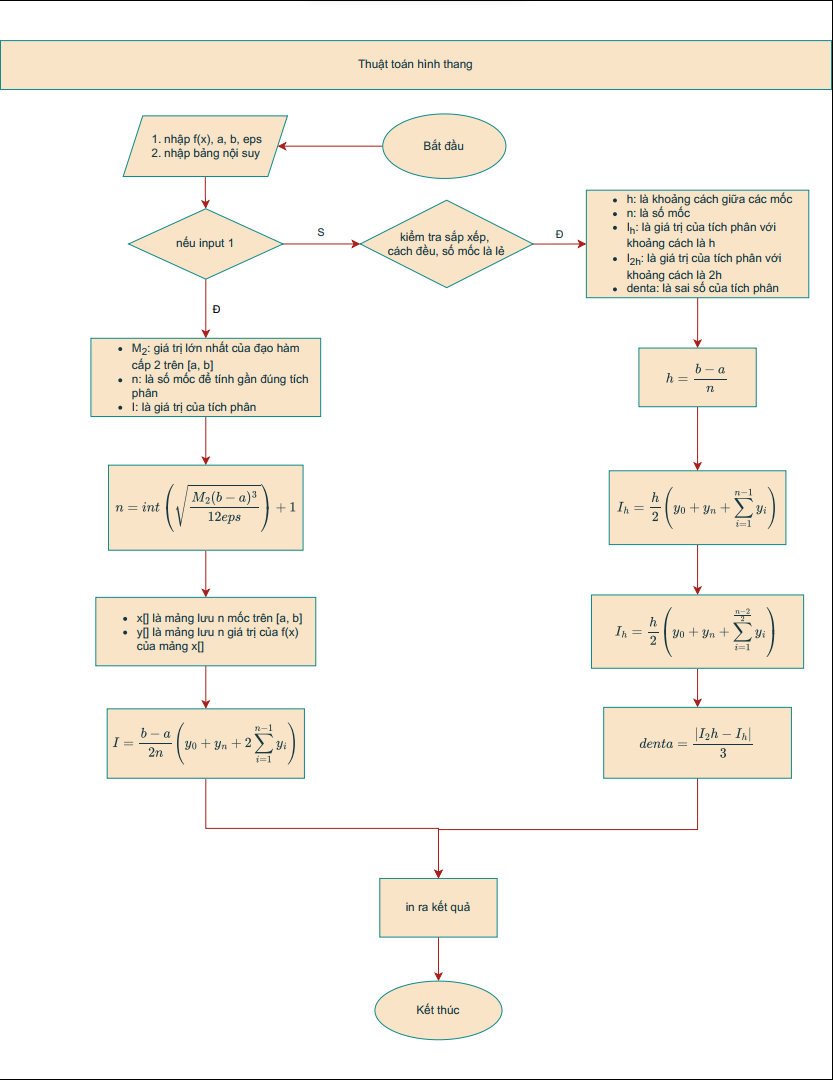\
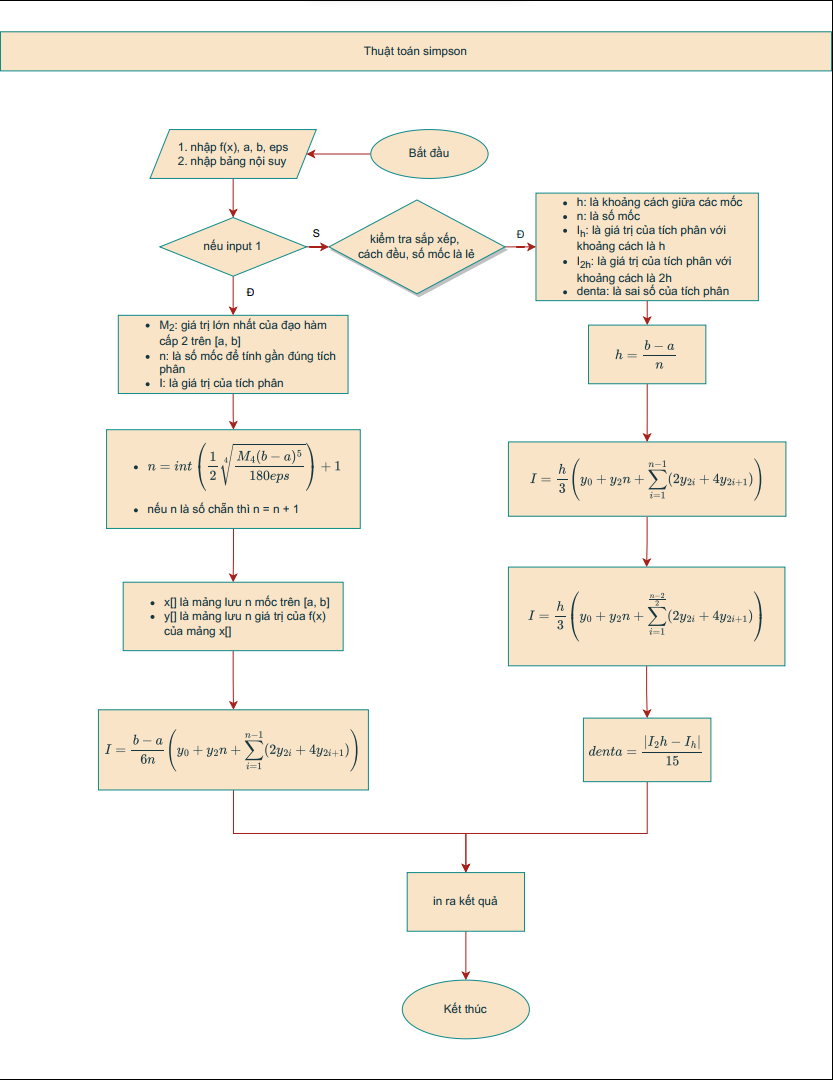\
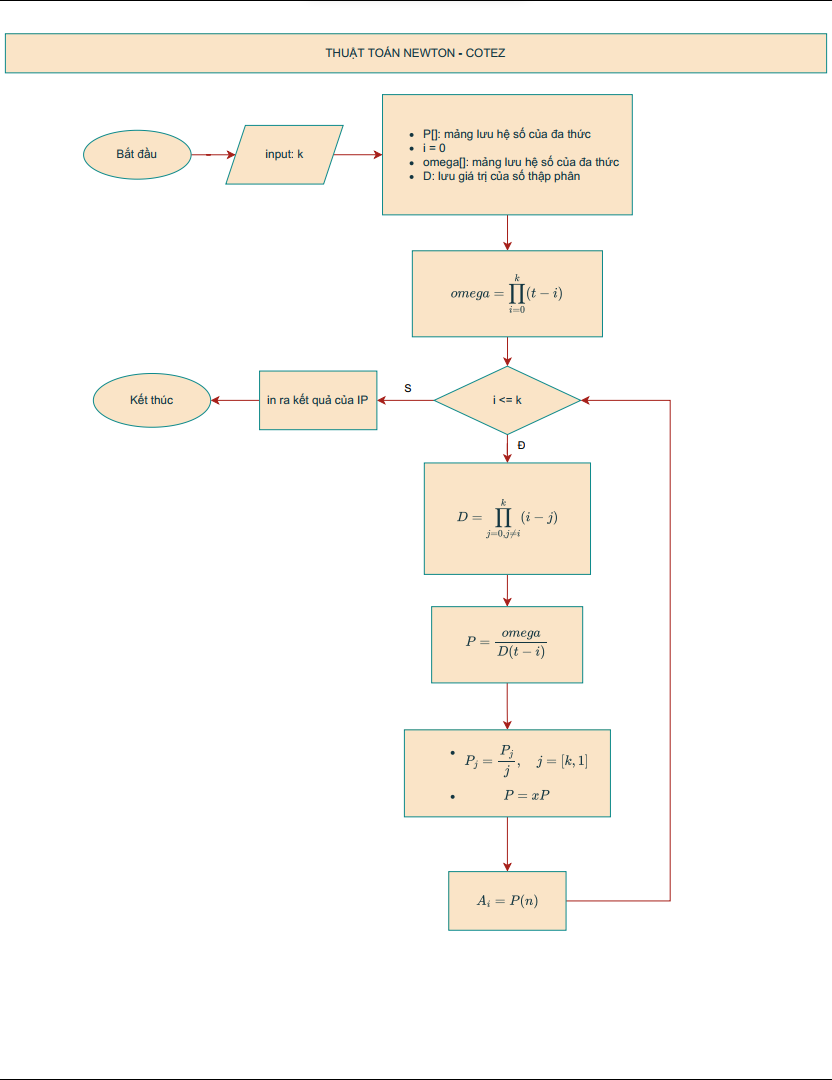